# Classification

## Mock Data

In [0]:
%matplotlib inline
import torch 
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [0]:
n_data = torch.ones(100, 2)

# Class 0
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(100)

# Class 1
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)

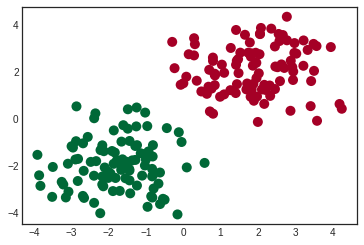

In [45]:
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), ).type(torch.LongTensor)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], 
            c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')

## Build network

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:
class Net(nn.Module):

  def __init__(self, n_feature, n_hidden, n_output):
    super(Net, self).__init__()
    self.hidden = nn.Linear(n_feature, n_hidden)
    self.out = nn.Linear(n_hidden, n_output)

  def forward(self, x):
    x = F.relu(self.hidden(x))
    x = self.out(x)
    return x

In [48]:
net = Net(n_feature=2, n_hidden=10, n_output=2)
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


## Train Network

In [0]:
import torch.optim as optim

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


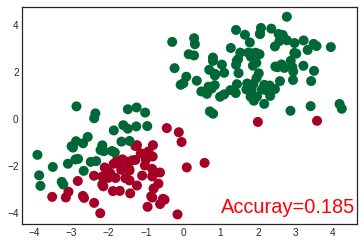

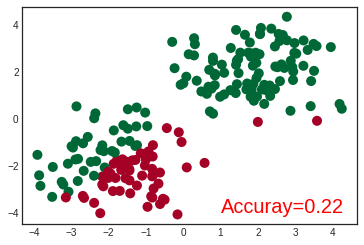

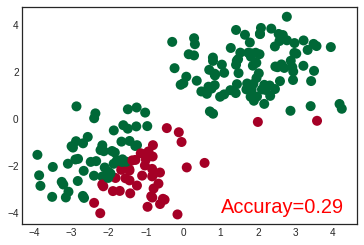

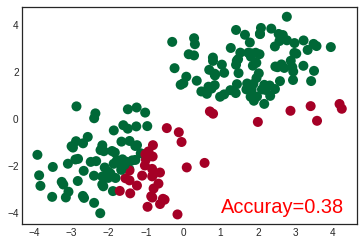

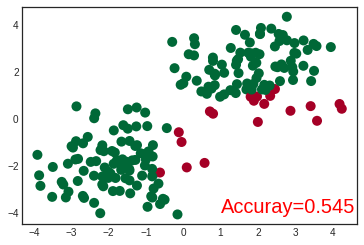

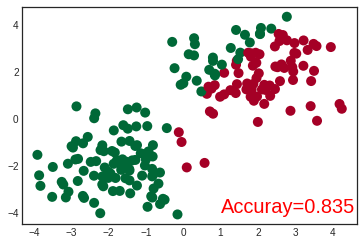

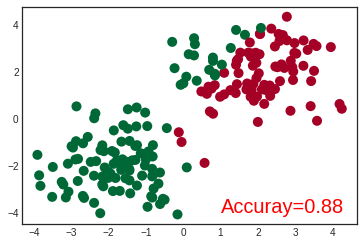

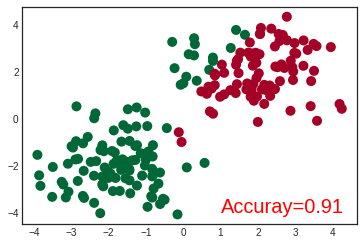

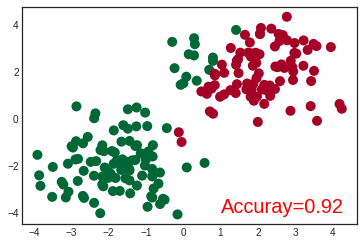

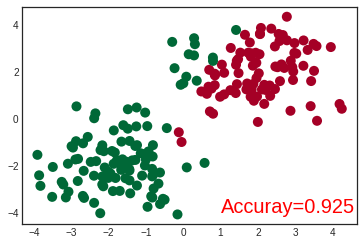

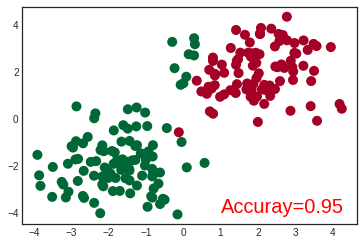

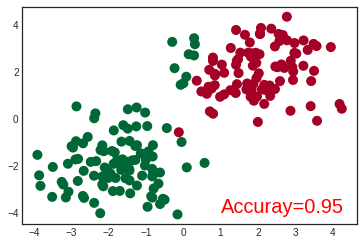

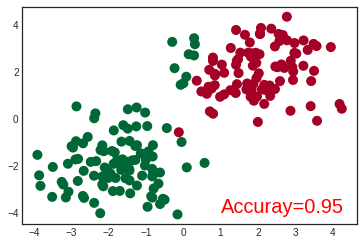

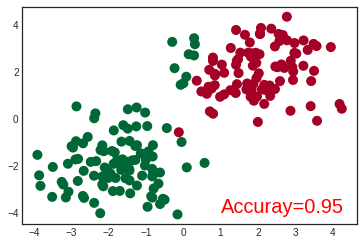

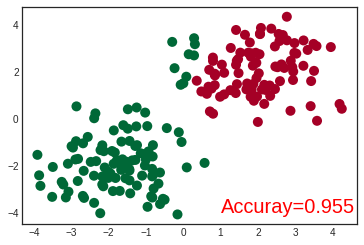

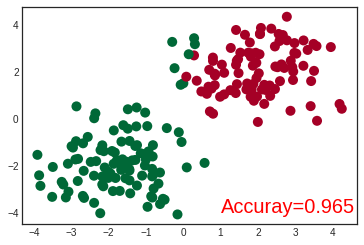

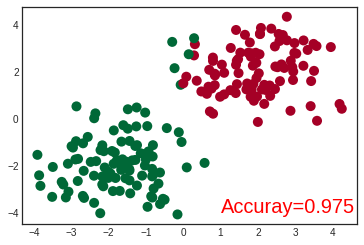

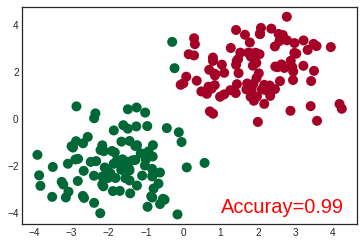

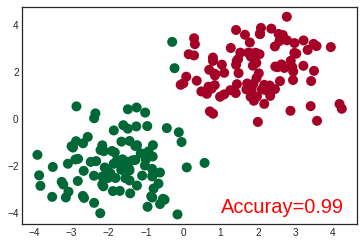

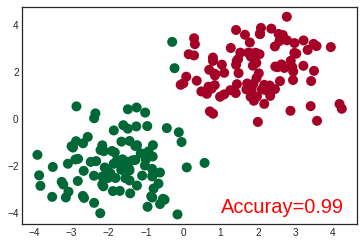

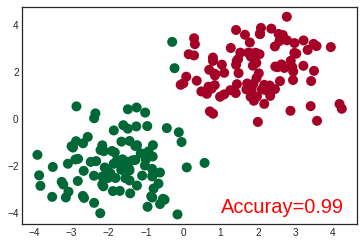

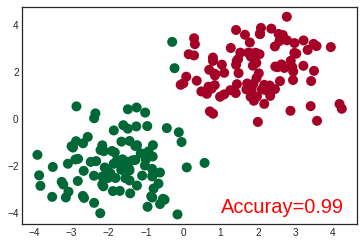

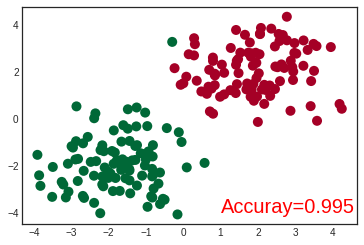

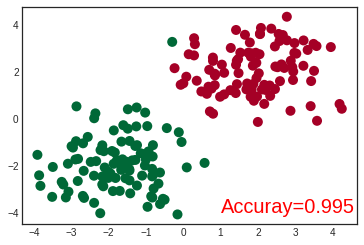

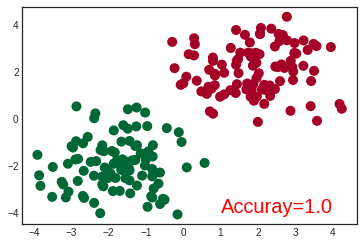

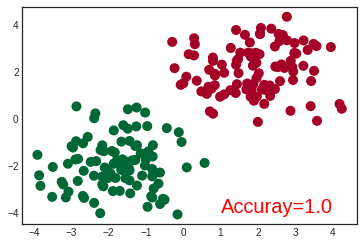

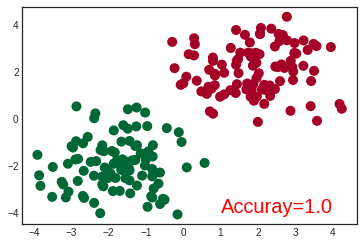

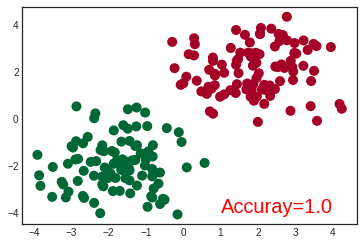

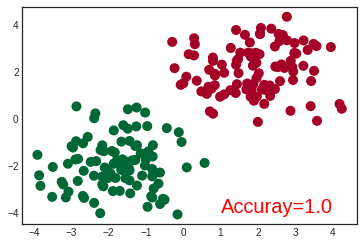

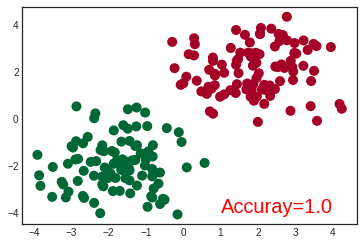

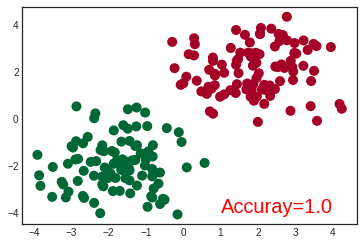

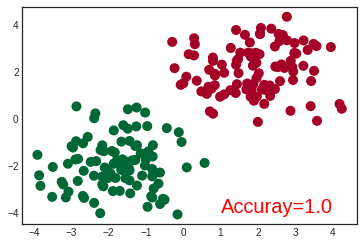

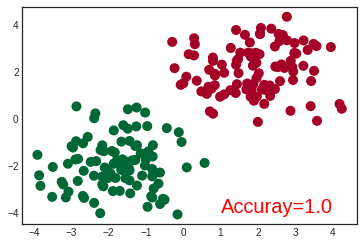

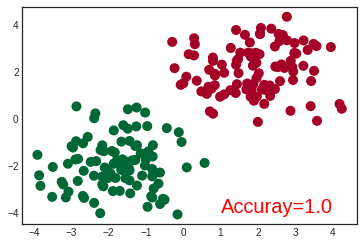

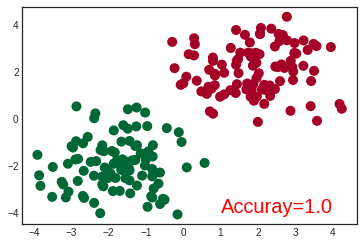

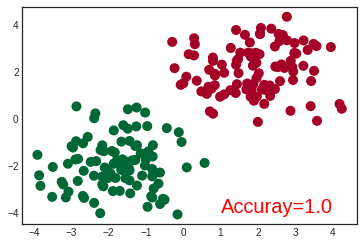

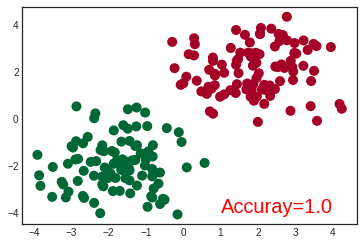

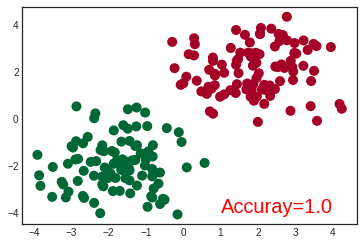

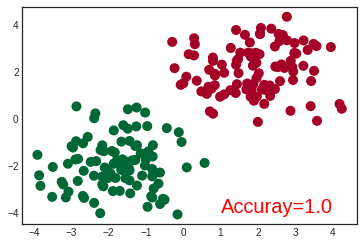

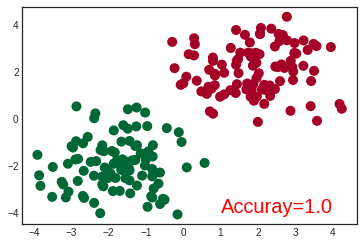

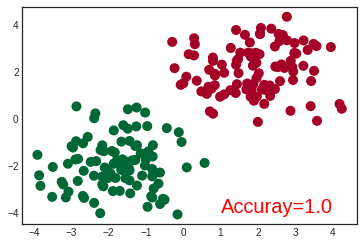

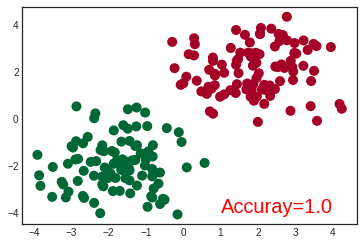

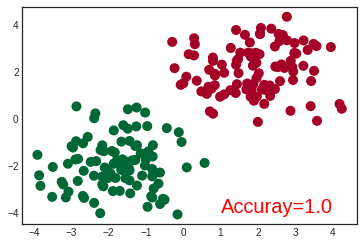

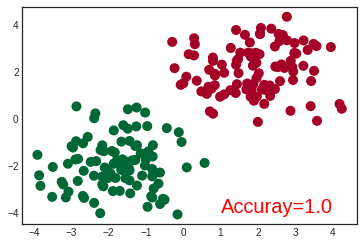

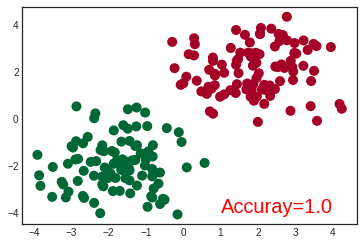

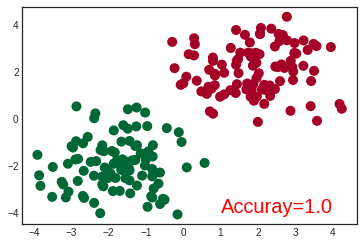

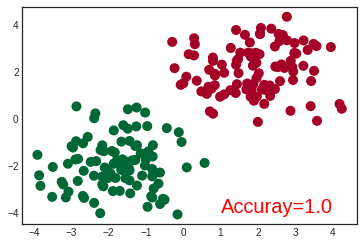

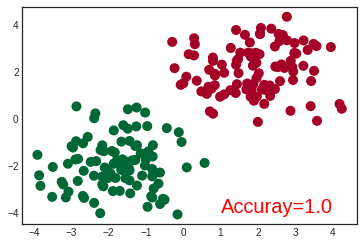

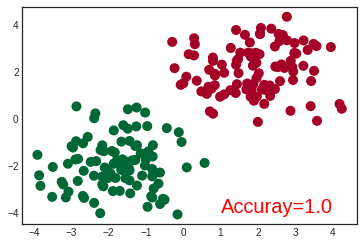

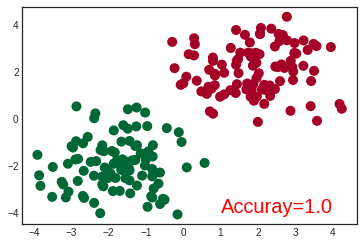

In [50]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = nn.CrossEntropyLoss()

plt.ion() # interactive mode for visualization

for t in range(100):
    optimizer.zero_grad()

    out = net(x)
    loss = loss_func(out, y)
    loss.backward()
    optimizer.step()

    # Visualization
    if t % 2 == 0:
        plt.cla()
        prediction = torch.max(F.softmax(out), 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1],
                    c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y) / (y0.shape[0] + y1.shape[0])
        plt.text(1, -4, f'Accuray={accuracy}', 
                 fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()    
